In [1]:
import numpy as np
from skimage.io import imread
from scipy.interpolate import NearestNDInterpolator
from tqdm import tqdm_notebook as tqdm 
# matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

from gsw.gsw import GSW
import torch

In [2]:
I=imread('./temp.png').mean(2)/128.
I=I[:,np.arange(219,-1,-1)]
# I=I[np.arange(219,-1,-1),:]

m,n=I.shape

gridx,gridy=np.meshgrid(np.linspace(-int(m/2),int(m/2),100),
                       np.linspace(-int(n/2),int(n/2),100))

gridvec=np.concatenate((np.reshape(gridx,-1)[:,np.newaxis],
                        np.reshape(gridy,-1)[:,np.newaxis]),1)

In [3]:
def sample_pdf(N):
    out=np.zeros((N,2))
    for n in range(N):
        coin=np.random.rand(1)
        if coin>=.5:
            out[n,:]=np.random.randn(1,2)*10-45.+110.
        elif coin>=(1./6.):
            out[n,:]=np.random.randn(1,2)*6+16.+110.
        else:
            out[n,:]=np.random.randn(1,2)*1+68.+110.
    return out

In [4]:
temp=sample_pdf(100000)

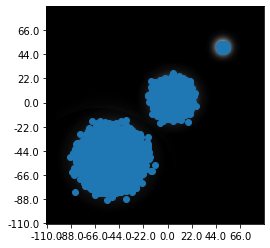

In [5]:
m,n=I.shape
plt.imshow(I,cmap='gray',origin=[110,110])
plt.xticks(np.linspace(0,m,num=10),np.linspace(-int(m/2),int(m/2),num=11))
plt.yticks(np.linspace(0,n,num=10),np.linspace(-int(n/2),int(n/2),num=11))
plt.scatter(temp[:,0],temp[:,1])
plt.show()

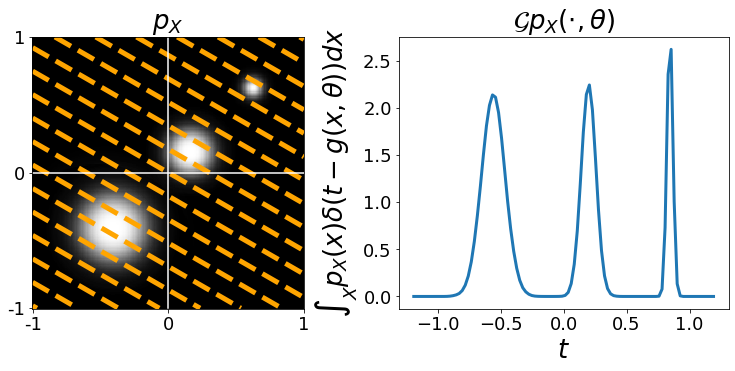

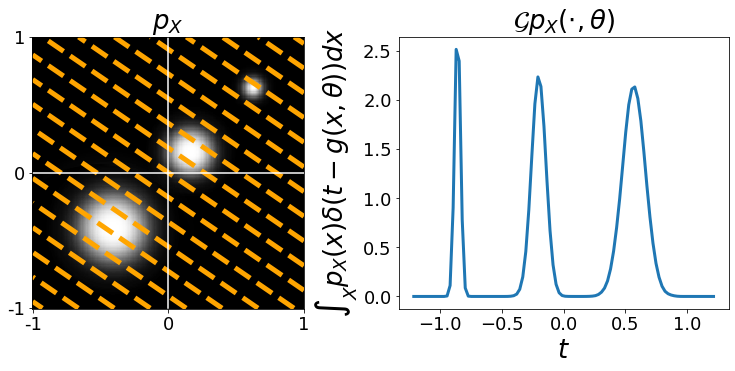

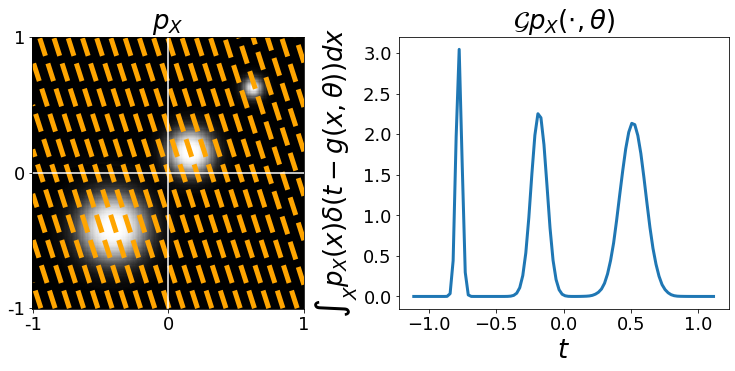

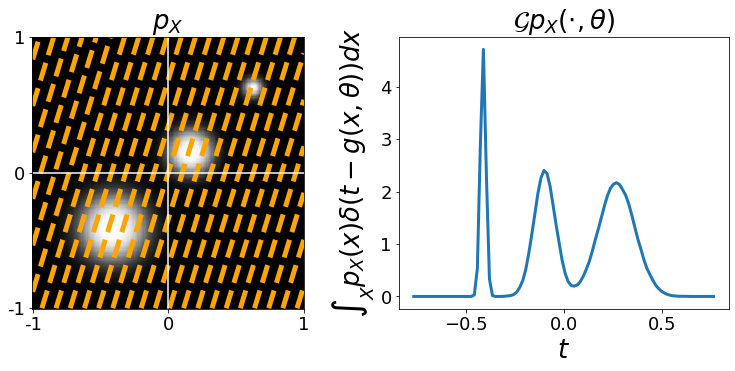

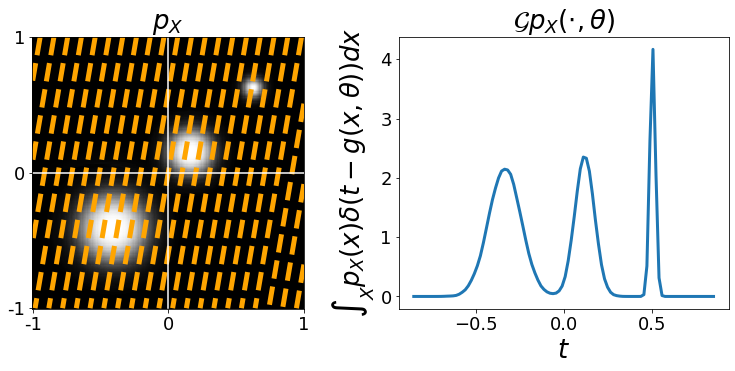

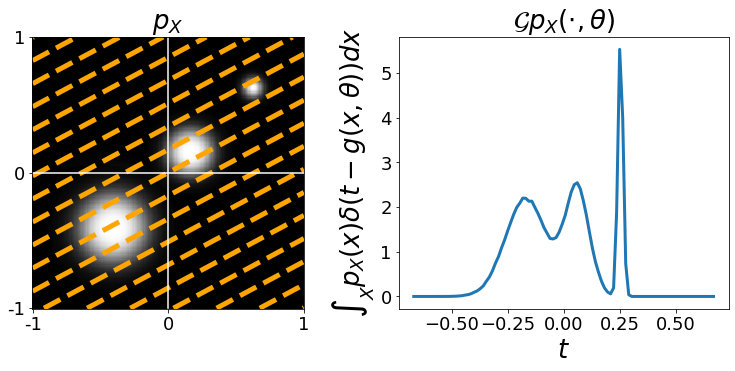

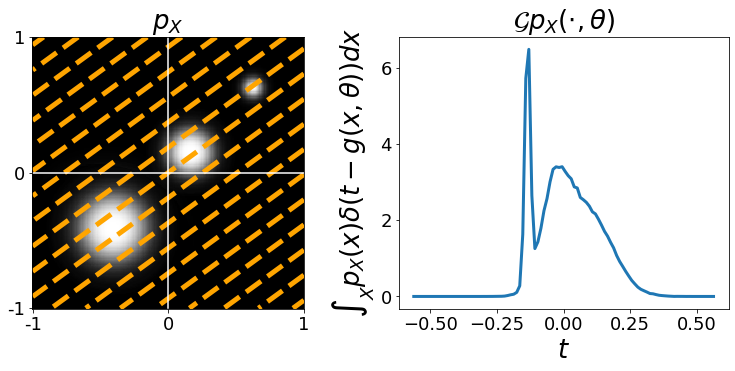

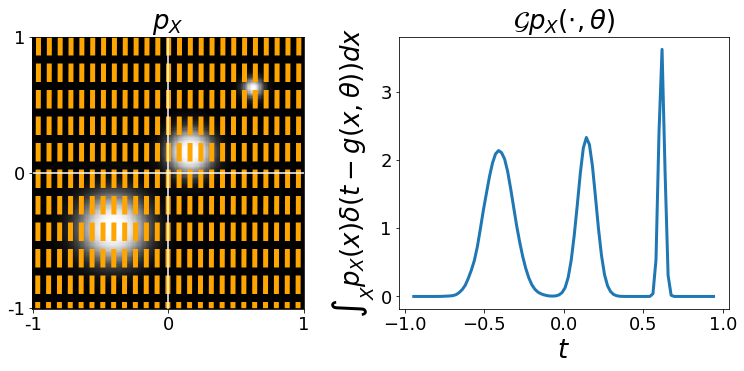

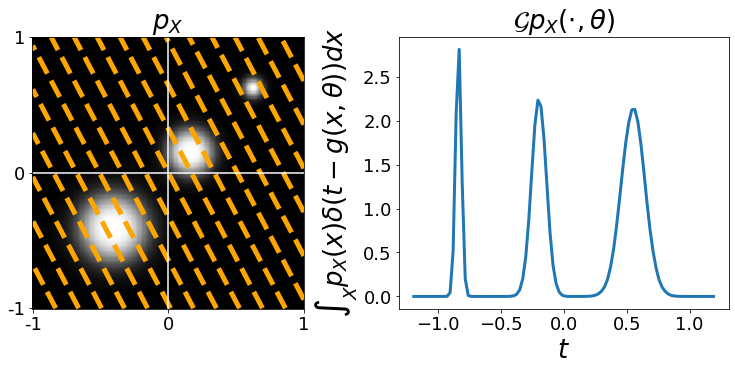

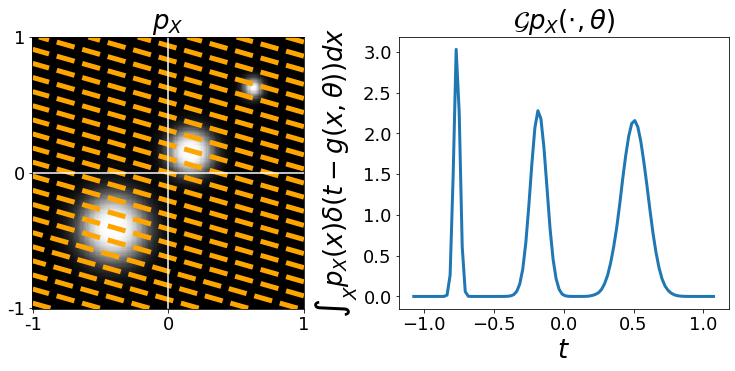

In [18]:
nofprojections=10

gsw=GSW(ftype='linear',nofprojections=nofprojections,degree=5)
theta=gsw.random_slice(2)
projs=gsw.get_slice(torch.from_numpy((temp-110)/110.),theta).numpy()
fgridvec=gsw.get_slice(torch.from_numpy((gridvec)/110.),theta).numpy()

for k in range(nofprojections):
    fig,ax=plt.subplots(1,2,figsize=(13,5))
    ax[0].imshow(I,cmap='gray',origin=[110,110])
    ax[0].plot([110,110],[0,220],'-',c='w')
    ax[0].plot([0,220],[110,110],'-',c='w')
    ax[0].contour(gridx+110, gridy+110,
                np.reshape(fgridvec[:,k],(100,100)),
                25, colors='orange',linewidths=5,linestyles='--')
    ax[0].set_xticks(np.linspace(0,220,3).astype('int'))
    ax[0].set_xticklabels([-1,0,1])
    ax[0].set_yticks(np.linspace(0,220,3).astype('int'))
    ax[0].set_yticklabels([-1,0,1])
    ax[0].set_title(r'$p_X$',fontsize=26)

    bw=projs[:,k].std()/25.
    kz1=KernelDensity(bandwidth=bw).fit(projs[:,k,np.newaxis])
    a=max(abs(projs[:,k].min()),abs(projs[:,k]).max())
    t=np.linspace(-1.2*a,1.2*a,100)
    pz1=np.exp(kz1.score_samples(t[:,np.newaxis]))
    
    ax[1].plot(t,pz1,linewidth=3)
#     ax[1].set_xticks(np.arange(0,312,50).astype('int'))
#     ax[1].set_xticklabels(np.arange(-150,155,50).astype('int'))
    ax[1].set_ylabel(r'$\int_X p_X(x)\delta(t- g(x,\theta))dx$',fontsize=26)
    ax[1].set_xlabel(r'$t$',fontsize=26)
    ax[1].set_title(r'$\mathcal{G}p_X(\cdot,\theta)$',fontsize=26)    
    
    for i in range(2):
        ax[i].tick_params(axis='x', which='major', labelsize=18)
        ax[i].tick_params(axis='y', which='major', labelsize=18)    

    plt.show()

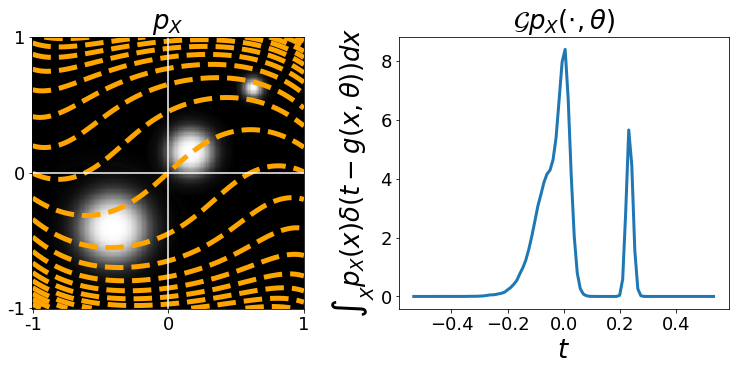

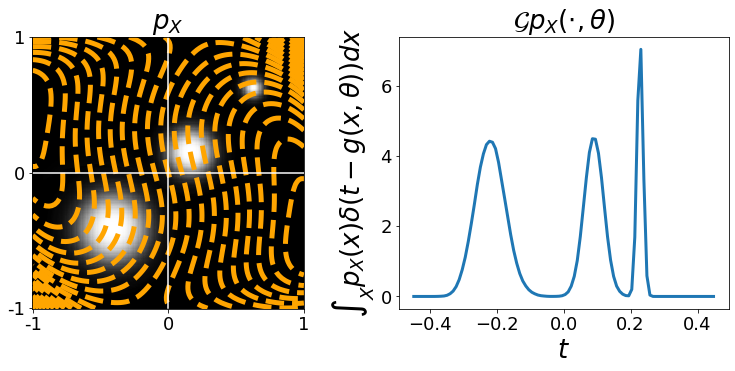

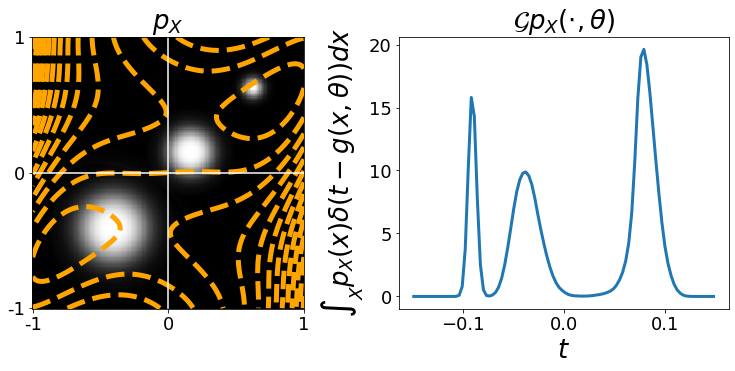

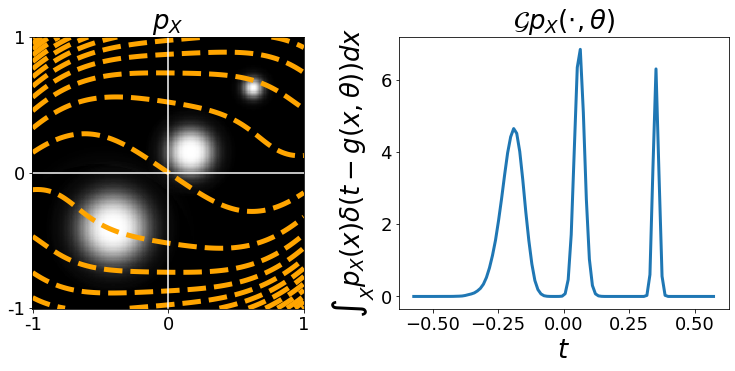

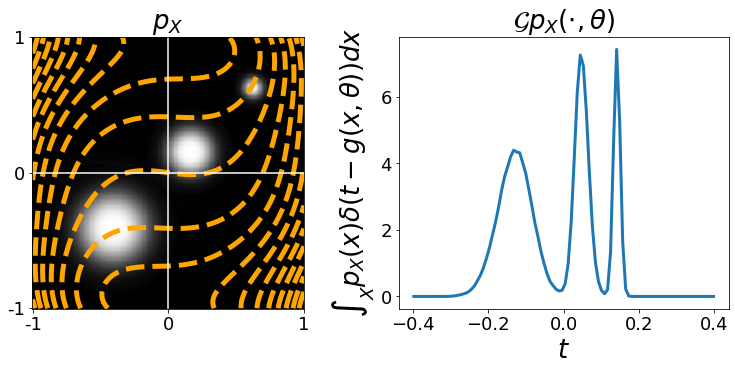

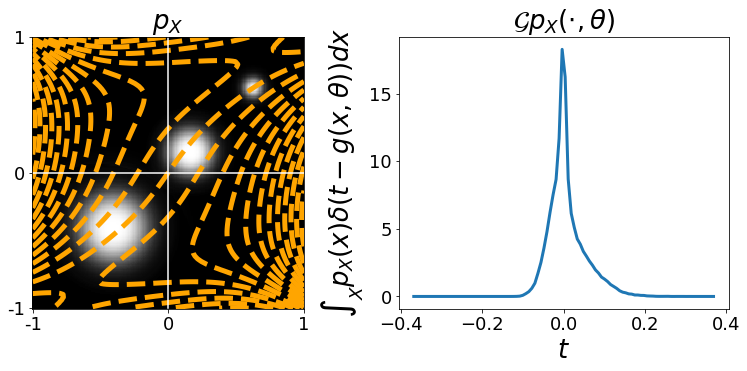

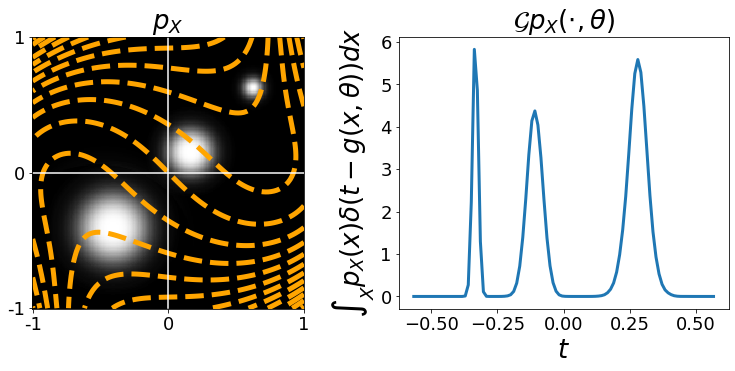

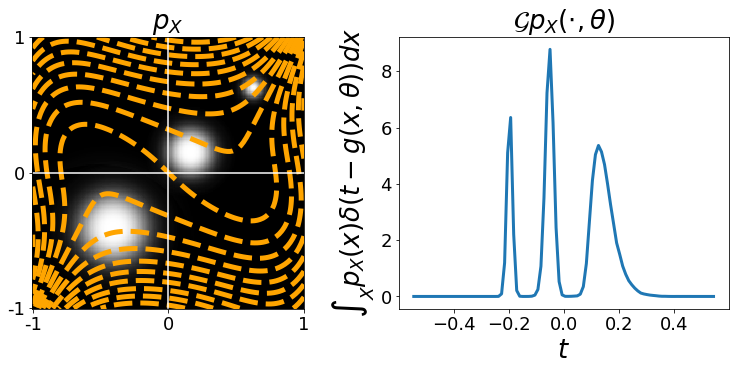

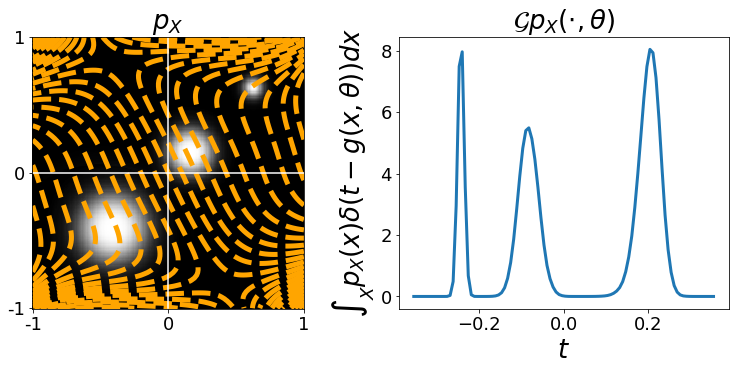

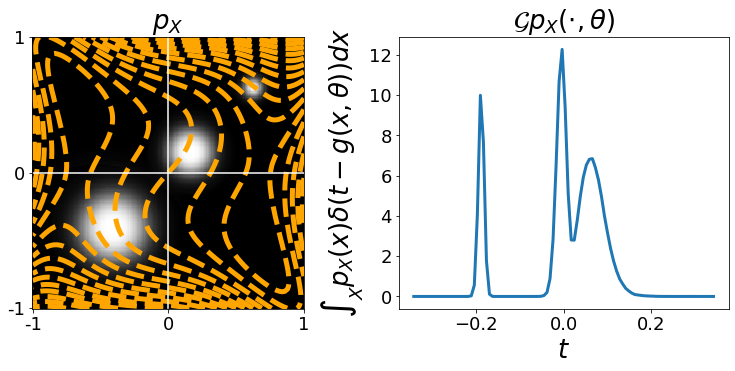

In [20]:
nofprojections=10

gsw=GSW(ftype='poly',nofprojections=nofprojections,degree=5)
theta=gsw.random_slice(2)
projs=gsw.get_slice(torch.from_numpy((temp-110)/110.),theta).numpy()
fgridvec=gsw.get_slice(torch.from_numpy((gridvec)/110.),theta).numpy()

for k in range(nofprojections):
    fig,ax=plt.subplots(1,2,figsize=(13,5))
    ax[0].imshow(I,cmap='gray',origin=[110,110])
    ax[0].plot([110,110],[0,220],'-',c='w')
    ax[0].plot([0,220],[110,110],'-',c='w')
    ax[0].contour(gridx+110, gridy+110,
                np.reshape(fgridvec[:,k],(100,100)),
                25, colors='orange',linewidths=5,linestyles='--')
    ax[0].set_xticks(np.linspace(0,220,3).astype('int'))
    ax[0].set_xticklabels([-1,0,1])
    ax[0].set_yticks(np.linspace(0,220,3).astype('int'))
    ax[0].set_yticklabels([-1,0,1])
    ax[0].set_title(r'$p_X$',fontsize=26)

    bw=projs[:,k].std()/25.
    kz1=KernelDensity(bandwidth=bw).fit(projs[:,k,np.newaxis])
    a=max(abs(projs[:,k].min()),abs(projs[:,k]).max())
    t=np.linspace(-1.2*a,1.2*a,100)
    pz1=np.exp(kz1.score_samples(t[:,np.newaxis]))
    
    ax[1].plot(t,pz1,linewidth=3)
#     ax[1].set_xticks(np.arange(0,312,50).astype('int'))
#     ax[1].set_xticklabels(np.arange(-150,155,50).astype('int'))
    ax[1].set_ylabel(r'$\int_X p_X(x)\delta(t- g(x,\theta))dx$',fontsize=26)
    ax[1].set_xlabel(r'$t$',fontsize=26)
    ax[1].set_title(r'$\mathcal{G}p_X(\cdot,\theta)$',fontsize=26)    
    
    for i in range(2):
        ax[i].tick_params(axis='x', which='major', labelsize=18)
        ax[i].tick_params(axis='y', which='major', labelsize=18)    

    plt.show()